## CS715 Final Project

In [1]:
!pip install statsmodels==0.13.2

import pandas as pd
from pandas import datetime

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-1-25b0e23c4649>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
import pandas as pd
from pandas import datetime

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np

<ipython-input-2-123fdcde6dc8>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Load new brunswick HPI Data

In [3]:
HPI_Data=pd.read_csv('NB_Data_Updated.csv')

Understanding HPI data set.

In [4]:
HPI_Data.head()

,Date,STATIC_TOTALCPICHANGE,TOTAL_CPI,Composite_HPI_SA,STATIC_TOTALCPICHANGE.1,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,Townhouse_Benchmark_SA,Apartment_Benchmark_SA
0,01-01-2005,1.9,105.3,100.0,0.6,100.0,100.0,100.0,100.0,100.0,219800.0,229800.0,202500.0,246800.0,169100.0,157600.0
1,01-02-2005,2.1,105.7,100.4,1.9,101.3,100.5,101.6,100.7,102.3,222500.0,232800.0,203500.0,250800.0,170200.0,161300.0
2,01-03-2005,2.3,106.3,101.1,2.1,102.7,100.8,103.5,101.5,104.9,225400.0,236100.0,204100.0,255500.0,171600.0,165300.0
3,01-04-2005,2.4,106.6,101.2,2.5,104.7,102.2,105.6,102.3,106.9,229300.0,240500.0,207000.0,260500.0,173000.0,168500.0
4,01-05-2005,1.6,106.7,101.5,2.9,106.5,103.5,107.6,103.0,109.4,233000.0,244700.0,209500.0,265500.0,174200.0,172400.0


In [5]:
HPI_Data['Date'] = pd.to_datetime(HPI_Data['Date'])

In [6]:
#setting index as date
HPI_Data=HPI_Data.set_index(HPI_Data['Date'])

In [7]:
HPI_Data.head()

,Date,STATIC_TOTALCPICHANGE,TOTAL_CPI,Composite_HPI_SA,STATIC_TOTALCPICHANGE.1,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,Townhouse_Benchmark_SA,Apartment_Benchmark_SA
Date,,,,,,,,,,,,,,,,
2005-01-01,2005-01-01,1.9,105.3,100.0,0.6,100.0,100.0,100.0,100.0,100.0,219800.0,229800.0,202500.0,246800.0,169100.0,157600.0
2005-01-02,2005-01-02,2.1,105.7,100.4,1.9,101.3,100.5,101.6,100.7,102.3,222500.0,232800.0,203500.0,250800.0,170200.0,161300.0
2005-01-03,2005-01-03,2.3,106.3,101.1,2.1,102.7,100.8,103.5,101.5,104.9,225400.0,236100.0,204100.0,255500.0,171600.0,165300.0
2005-01-04,2005-01-04,2.4,106.6,101.2,2.5,104.7,102.2,105.6,102.3,106.9,229300.0,240500.0,207000.0,260500.0,173000.0,168500.0
2005-01-05,2005-01-05,1.6,106.7,101.5,2.9,106.5,103.5,107.6,103.0,109.4,233000.0,244700.0,209500.0,265500.0,174200.0,172400.0


In [8]:
HPI_Data=HPI_Data.dropna()

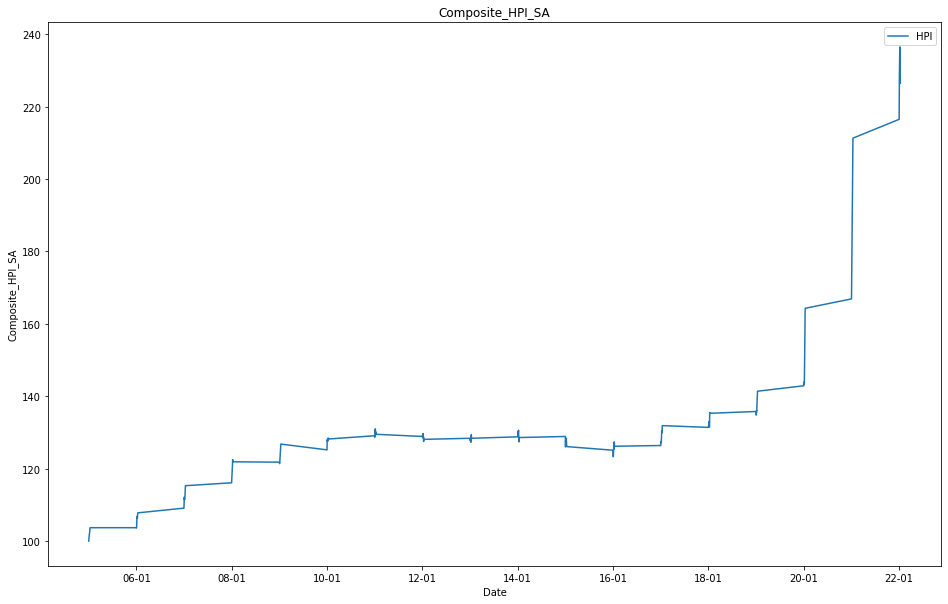

In [9]:
# plot Composite_HPI_sa
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(HPI_Data['Date'], HPI_Data['Composite_HPI_SA'], label="HPI")


ax.set(xlabel="Date", ylabel="Composite_HPI_SA",
       title="Composite_HPI_SA")

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%y-%m"))

plt.legend()
plt.show()

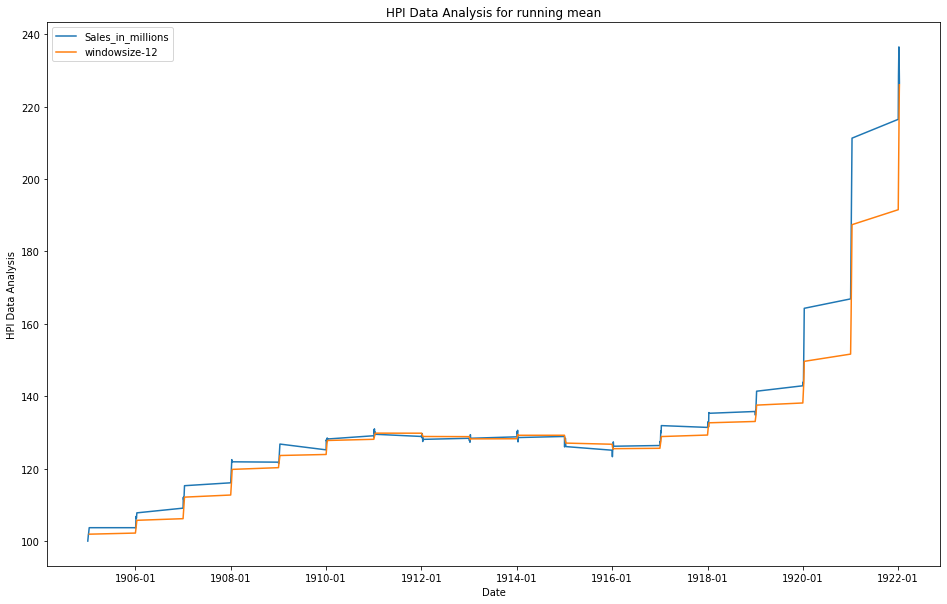

In [10]:
# plot for hpi analysis
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(HPI_Data['Date'], HPI_Data['Composite_HPI_SA'], label="Sales_in_millions")
#ax.plot(HPI_Data['Date'], HPI_Data['Composite_HPI_SA'].rolling( window=3).mean(), label="windowsize-3")
ax.plot(HPI_Data['Date'], HPI_Data['Composite_HPI_SA'].rolling( window=12).mean(), label="windowsize-12")

ax.set(xlabel="Date", ylabel="HPI Data Analysis",
       title="HPI Data Analysis for running mean")

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("19%y-%m"))

plt.legend()
plt.show()

In [11]:
HPI_Data['Composite_HPI_SA']=HPI_Data['Composite_HPI_SA'].dropna()

In [12]:
# test for stationarity
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['p-value','#Lags Used']
    print(labels[0]+' : '+str(result[1])) 
    print(labels[1]+' : '+str(result[2]))
    if result[1] <= 0.05:
        print("Data has no unit root and is stationary")
    else:
        print("Data is non-stationary ")

In [13]:
adfuller_test(HPI_Data['Composite_HPI_SA'].dropna())

p-value : 0.6948925025831387
#Lags Used : 13
Data is non-stationary 


In [14]:
#stationary after second differencing
adfuller_test(HPI_Data['Composite_HPI_SA'].diff().dropna().dropna().diff().dropna())

p-value : 0.00045157278144502183
#Lags Used : 11
Data has no unit root and is stationary


In [15]:
dup_HPI_Data=HPI_Data
size = int(len(dup_HPI_Data) * 0.945)

In [16]:
train, test = dup_HPI_Data[0:size], dup_HPI_Data[size:len(dup_HPI_Data)]

In [17]:
len(train)

202

In [18]:
#test size
len(test)

12

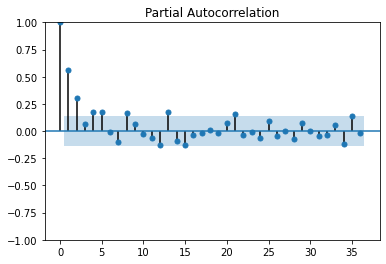

In [19]:
plot_pacf(train['Composite_HPI_SA'].diff().dropna(),lags=36,method='ywm');

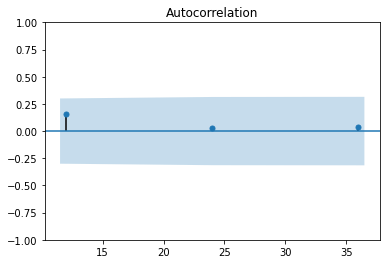

In [20]:
plot_acf(train['Composite_HPI_SA'].diff().dropna(),lags=[12,24,36]);

Unable to properly consider p and q values from pacf and acf graphs

In [21]:
test=test.set_index(test['Date'])

In [22]:
train_series=train['Composite_HPI_SA'].squeeze()
test_series=test['Composite_HPI_SA'].squeeze()
train_series_nd=train_series.values
test_series_nd=test_series.values

In [23]:
test_series

Date
2021-01-11    206.8
2021-01-12    211.3
2022-01-01    216.5
2022-01-02    223.5
2022-01-03    228.5
2022-01-04    231.5
2022-01-05    234.3
2022-01-06    236.5
2022-01-07    235.8
2022-01-08    231.7
2022-01-09    229.7
2022-01-10    226.5
Name: Composite_HPI_SA, dtype: float64

In [24]:
# grid search for ideal p and q values
best_aic=0
flag=0
for p in range(4):
  for q in range(4):
    model = ARIMA(train_series, order=(p ,1, q))
    model_fit = model.fit()
    aic=model_fit.aic
    if((aic>=best_aic) & (flag==0)):
        best_aic=aic
        flag=1
        best_p=p
        best_q=q
    if((aic<best_aic) & (flag==1)):
      best_aic=aic
      best_p=p
      best_q=q
print('Best p and q combination for 1st difference arima model with low aic score')
print(f'best p value {best_p}')
print(f'best q value {best_q}')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

Best p and q combination for 1st difference arima model with low aic score
best p value 3
best q value 3


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
#by above output p=3 and q=3
model = ARIMA(train_series, order=(3 ,2, 3))
model_fit = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
len(test_series)

12

In [27]:
test_series.index

DatetimeIndex(['2021-01-11', '2021-01-12', '2022-01-01', '2022-01-02',
               '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [28]:
forecast = model_fit.forecast(steps=12)
print(forecast)

202    205.353870
203    209.184781
204    213.367767
205    217.832559
206    222.015404
207    225.866633
208    229.898093
209    234.285410
210    238.593401
211    242.548256
212    246.488633
213    250.756023
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [29]:
#pd.date_range('2019-01-05':'2022-01-11')
forecast.index=test_series.index

In [30]:
type(forecast)

pandas.core.series.Series

In [31]:
forecast

Date
2021-01-11    205.353870
2021-01-12    209.184781
2022-01-01    213.367767
2022-01-02    217.832559
2022-01-03    222.015404
2022-01-04    225.866633
2022-01-05    229.898093
2022-01-06    234.285410
2022-01-07    238.593401
2022-01-08    242.548256
2022-01-09    246.488633
2022-01-10    250.756023
Name: predicted_mean, dtype: float64

In [32]:
#rmse
rmse = sqrt(mean_squared_error(forecast, test_series))
print(rmse)
print('ARIMA(3,2,3) RMSE: %.2f' % rmse)

9.756462827544942
ARIMA(3,2,3) RMSE: 9.76


In [33]:
#normalised rmse
rmse/(test_series.max()-test_series.min())

0.32850043190387024

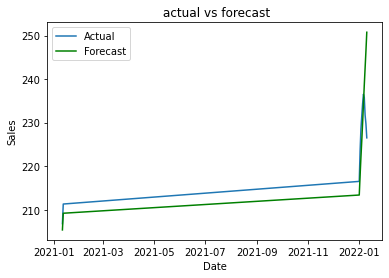

In [34]:
#plot for results
plt.plot(test_series, label="Actual")
plt.plot(forecast.index,forecast, color='green', label="Forecast")
plt.title(" actual vs forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

## Vector auto regression implementation

In [35]:
from statsmodels.tsa.stattools import grangercausalitytests

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR

from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

In [37]:
Canada_HPI=pd.read_csv('NB_Data_Updated.csv',parse_dates=True)

Canada_HPI=Canada_HPI.set_index(Canada_HPI['Date'])

In [38]:
Canada_HPI=Canada_HPI.dropna()

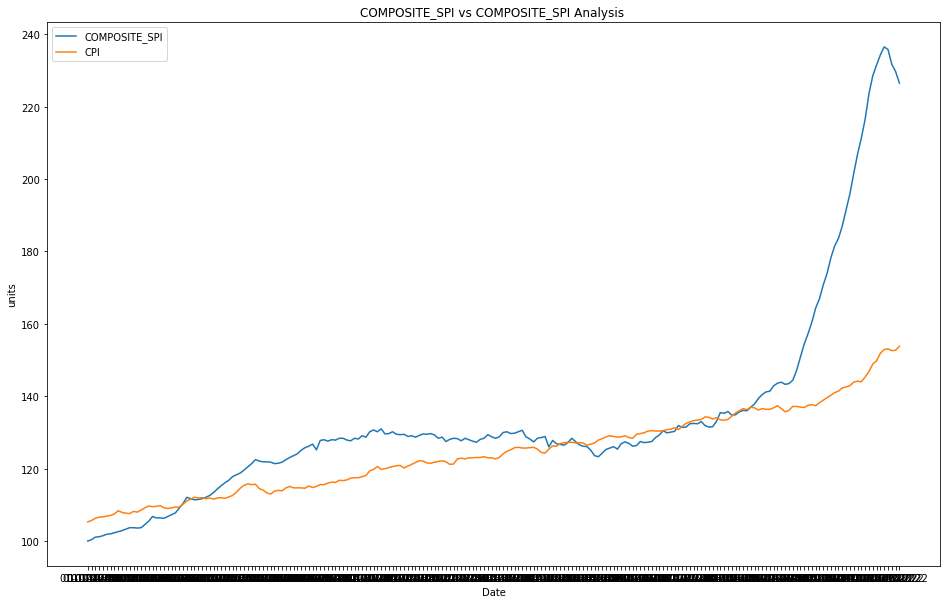

In [39]:
#plot for hpi and total cpi
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(Canada_HPI['Date'], Canada_HPI['Composite_HPI_SA'], label="COMPOSITE_SPI")

ax.plot(Canada_HPI['Date'], Canada_HPI['TOTAL_CPI'], label="CPI")

ax.set(xlabel="Date", ylabel="units",
       title="COMPOSITE_SPI vs COMPOSITE_SPI Analysis ")

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#ax.xaxis.set_major_formatter(DateFormatter("%y-%m"))
plt.legend()
plt.show()

In [40]:
Canada_HPI=Canada_HPI.dropna()

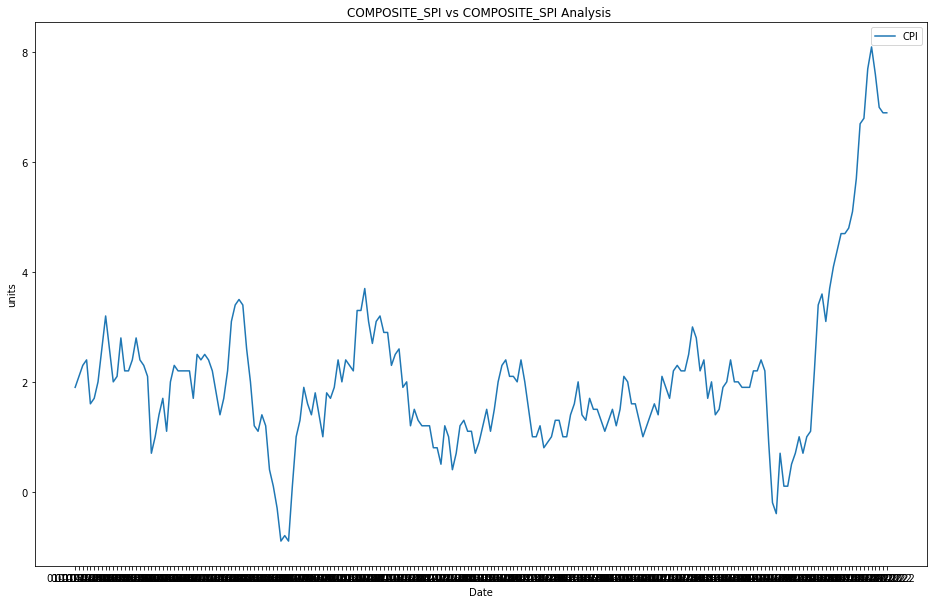

In [74]:
#plot for composite spi and static total cpi change
fig, ax = plt.subplots(figsize=(16,10))

#ax.plot(Canada_HPI['Date'], Canada_HPI['Composite_HPI_SA'], label="COMPOSITE_SPI")

ax.plot(Canada_HPI['Date'], Canada_HPI['STATIC_TOTALCPICHANGE'], label="CPI")

ax.set(xlabel="Date", ylabel="units",
       title="COMPOSITE_SPI vs COMPOSITE_SPI Analysis ")

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#ax.xaxis.set_major_formatter(DateFormatter("%y-%m"))
plt.legend()
plt.show()

In [43]:
#stationary after first order differencing
adfuller_test(Canada_HPI['STATIC_TOTALCPICHANGE'].diff().dropna())

p-value : 0.00031260259525553143
#Lags Used : 12
Data has no unit root and is stationary


In [44]:
#statictotal cpi granger cause compoiste hpi granger cuasality hypothesis testing 
granger_spending = grangercausalitytests(Canada_HPI[['STATIC_TOTALCPICHANGE', 'Composite_HPI_SA']], 8)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.3353 , p=0.0003  , df_denom=210, df_num=1
ssr based chi2 test:   chi2=13.5259 , p=0.0002  , df=1
likelihood ratio test: chi2=13.1138 , p=0.0003  , df=1
parameter F test:         F=13.3353 , p=0.0003  , df_denom=210, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.1885  , p=0.0004  , df_denom=207, df_num=2
ssr based chi2 test:   chi2=16.7725 , p=0.0002  , df=2
likelihood ratio test: chi2=16.1420 , p=0.0003  , df=2
parameter F test:         F=8.1885  , p=0.0004  , df_denom=207, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.3493  , p=0.0004  , df_denom=204, df_num=3
ssr based chi2 test:   chi2=19.7016 , p=0.0002  , df=3
likelihood ratio test: chi2=18.8353 , p=0.0003  , df=3
parameter F test:         F=6.3493  , p=0.0004  , df_denom=204, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.7592  , p=0.0011  

Since p values have smaller values than alpha which is a clear indication of cause and effect relationship fot CPI ang HPI

In [45]:
Canada_HPI_diff1=Canada_HPI[['Composite_HPI_SA', 'STATIC_TOTALCPICHANGE']].diff().dropna()

In [75]:
train_length=len(Canada_HPI_diff1)*0.95
test_length=len(Canada_HPI_diff1)*0.05
print(int(train_length))
print(test_length)

202
10.65


In [76]:
Canada_HPI_diff1.index

Index(['01-02-2005', '01-03-2005', '01-04-2005', '01-05-2005', '01-06-2005',
       '01-07-2005', '01-08-2005', '01-09-2005', '01-10-2005', '01-11-2005',
       ...
       '01-01-2022', '01-02-2022', '01-03-2022', '01-04-2022', '01-05-2022',
       '01-06-2022', '01-07-2022', '01-08-2022', '01-09-2022', '01-10-2022'],
      dtype='object', name='Date', length=213)

In [77]:
train=Canada_HPI_diff1[:200]

In [78]:
test=Canada_HPI_diff1[200:]

In [79]:
train.head()
print(len(train))
print(len(test))

200
13


In [52]:
print(test)

            Composite_HPI_SA  STATIC_TOTALCPICHANGE
Date                                               
01-10-2021               5.6                    0.3
01-11-2021               5.3                    0.0
01-12-2021               4.5                    0.1
01-01-2022               5.2                    0.3
01-02-2022               7.0                    0.6
01-03-2022               5.0                    1.0
01-04-2022               3.0                    0.1
01-05-2022               2.8                    0.9
01-06-2022               2.2                    0.4
01-07-2022              -0.7                   -0.5
01-08-2022              -4.1                   -0.6
01-09-2022              -2.0                   -0.1
01-10-2022              -3.2                    0.0


In [53]:
#VAR model building
model_1 = VAR(train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [54]:
var= VAR(train)
model_var = var.fit(4)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [55]:
print(train)

            Composite_HPI_SA  STATIC_TOTALCPICHANGE
Date                                               
01-02-2005               0.4                    0.2
01-03-2005               0.7                    0.2
01-04-2005               0.1                    0.1
01-05-2005               0.3                   -0.8
01-06-2005               0.4                    0.1
...                      ...                    ...
01-05-2021               3.3                    0.2
01-06-2021               2.1                   -0.5
01-07-2021               3.4                    0.6
01-08-2021               4.5                    0.4
01-09-2021               4.4                    0.3

[200 rows x 2 columns]


In [56]:
type(train)

pandas.core.frame.DataFrame

In [57]:
train.tail(11)

,Composite_HPI_SA,STATIC_TOTALCPICHANGE
Date,,
01-11-2020,3.2,0.3
01-12-2020,3.9,-0.3
01-01-2021,2.6,0.3
01-02-2021,3.8,0.1
01-03-2021,3.2,1.1
01-04-2021,4.3,1.2
01-05-2021,3.3,0.2
01-06-2021,2.1,-0.5
01-07-2021,3.4,0.6


In [58]:
print(model_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 20, Dec, 2022
Time:                     15:51:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.66283
Nobs:                     196.000    HQIC:                  -1.84201
Log likelihood:          -345.763    FPE:                   0.140330
AIC:                     -1.96389    Det(Omega_mle):        0.128279
--------------------------------------------------------------------
Results for equation Composite_HPI_SA
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.093805         0.067283            1.394           0.163
L1.Composite_HPI_SA              0.375843         0.070810            5.308           0.000
L1.ST

In [59]:
test

,Composite_HPI_SA,STATIC_TOTALCPICHANGE
Date,,
01-10-2021,5.6,0.3
01-11-2021,5.3,0.0
01-12-2021,4.5,0.1
01-01-2022,5.2,0.3
01-02-2022,7.0,0.6
01-03-2022,5.0,1.0
01-04-2022,3.0,0.1
01-05-2022,2.8,0.9
01-06-2022,2.2,0.4


In [60]:
predicted_values = model_var.forecast(y=train.values[:200],steps=13)

In [61]:
idx = pd.date_range(start='01-10-2021	',periods=13,freq='MS')
predictions = pd.DataFrame(predicted_values,index=idx,columns=['Composite_HPI_SA ','STATIC_TOTALCPICHANGE'])

In [62]:
predictions

,Composite_HPI_SA,STATIC_TOTALCPICHANGE
2021-02-01,3.454583,0.282918
2021-03-01,3.332654,0.301949
2021-04-01,3.424655,0.368814
2021-05-01,3.419829,0.390104
2021-06-01,3.159076,0.314941
2021-07-01,2.992250,0.287090
2021-08-01,2.914242,0.282351
2021-09-01,2.838566,0.285674
2021-10-01,2.726164,0.270543
2021-11-01,2.614542,0.254497


In [63]:
predictions['Composite_HPI_SA_O'] = Canada_HPI['Composite_HPI_SA'][-13] + predictions['Composite_HPI_SA '].cumsum()

In [64]:
predictions

,Composite_HPI_SA,STATIC_TOTALCPICHANGE,Composite_HPI_SA_O
2021-02-01,3.454583,0.282918,204.954583
2021-03-01,3.332654,0.301949,208.287237
2021-04-01,3.424655,0.368814,211.711891
2021-05-01,3.419829,0.390104,215.131720
2021-06-01,3.159076,0.314941,218.290796
2021-07-01,2.992250,0.287090,221.283046
2021-08-01,2.914242,0.282351,224.197289
2021-09-01,2.838566,0.285674,227.035855
2021-10-01,2.726164,0.270543,229.762019
2021-11-01,2.614542,0.254497,232.376561


In [65]:
test_original=Canada_HPI[201:]
len(test_original)

13

In [66]:
predictions.index=test_original.index

In [67]:
test_original['Composite_HPI_SA']

Date
01-10-2021    201.5
01-11-2021    206.8
01-12-2021    211.3
01-01-2022    216.5
01-02-2022    223.5
01-03-2022    228.5
01-04-2022    231.5
01-05-2022    234.3
01-06-2022    236.5
01-07-2022    235.8
01-08-2022    231.7
01-09-2022    229.7
01-10-2022    226.5
Name: Composite_HPI_SA, dtype: float64

In [71]:
#RMSE value Calculation
rmse = sqrt(mean_squared_error(test_original['Composite_HPI_SA'], predictions['Composite_HPI_SA_O']))
print(rmse)
print('HPI predictions RMSE based on 2 variables of VAR : %.2f' % rmse)

6.213483655152141
HPI predictions RMSE based on 2 variables of VAR : 6.21


In [72]:
import math  
import sklearn.metrics 
mse = sklearn.metrics.mean_squared_error(test_original['Composite_HPI_SA'], predictions['Composite_HPI_SA_O'])  
  
rmse = math.sqrt(mse)


In [73]:
#Normalised RMSE Value calculation
rmse/(test_original['Composite_HPI_SA'].max()-test_original['Composite_HPI_SA'].min())

0.1775281044329183